In [1]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from ruamel.yaml.scalarfloat import ScalarFloat

In [2]:
# creating paths
path = 'SavedModels/BIN-MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-13' # 2
config_name = 'config_001_unet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_59999.pt' #  model_299999_hollowMLEProb.pt

#config_name = 'config_001_r07.yaml' 
#model_name = 'model_84999_hollowr07.pt' 
config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)

In [3]:
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'ElboLBJF' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.loss.logit_type = 'reverse_prob'
cfg.sampler.num_corrector_steps = 3
cfg.sampler.corrector_entry_time = ScalarFloat(0.1)
cfg.sampler.num_steps = 1000
cfg.sampler.is_ordinal = False

#print(cfg)
device = torch.device(cfg.device)

model = model_utils.create_model(cfg, device)
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))

#modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
#model.load_state_dict(modified_model_state)
#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path)
state['model'].eval()

number of parameters:  6138946
ema state dict function


In [4]:
n_samples = 36
samples, changes = sampler.sample(model, n_samples)
saved_samples = samples

904it [00:36, 31.04it/s]

corrector
corrector


908it [00:37, 20.01it/s]

corrector
corrector


911it [00:37, 14.82it/s]

corrector
corrector
corrector


914it [00:38, 10.85it/s]

corrector
corrector


916it [00:38, 10.21it/s]

corrector
corrector


918it [00:38,  9.31it/s]

corrector
corrector


920it [00:38,  8.41it/s]

corrector
corrector


922it [00:39,  8.01it/s]

corrector
corrector


924it [00:39,  8.48it/s]

corrector
corrector


926it [00:39,  8.00it/s]

corrector
corrector


928it [00:39,  7.86it/s]

corrector
corrector


930it [00:40,  6.34it/s]

corrector
corrector


932it [00:40,  7.01it/s]

corrector
corrector


934it [00:40,  6.12it/s]

corrector
corrector


936it [00:41,  6.15it/s]

corrector
corrector


939it [00:41,  7.78it/s]

corrector
corrector
corrector


941it [00:41,  8.40it/s]

corrector
corrector


943it [00:42,  8.19it/s]

corrector
corrector


946it [00:42,  7.95it/s]

corrector
corrector


947it [00:42,  7.77it/s]

corrector
corrector


950it [00:42,  9.02it/s]

corrector
corrector
corrector


952it [00:43,  7.65it/s]

corrector
corrector


953it [00:43,  7.58it/s]

corrector
corrector


956it [00:43,  6.50it/s]

corrector


957it [00:44,  5.66it/s]

corrector


958it [00:44,  5.30it/s]

corrector
corrector


960it [00:44,  6.02it/s]

corrector
corrector


962it [00:44,  6.47it/s]

corrector
corrector
corrector


966it [00:45,  9.38it/s]

corrector
corrector
corrector


970it [00:45, 11.14it/s]

corrector
corrector
corrector
corrector
corrector


972it [00:45,  9.63it/s]

corrector
corrector


975it [00:46,  8.12it/s]

corrector
corrector


977it [00:46,  7.31it/s]

corrector
corrector


979it [00:46,  7.02it/s]

corrector
corrector


981it [00:47,  7.31it/s]

corrector
corrector


983it [00:47,  7.59it/s]

corrector
corrector


985it [00:47,  7.03it/s]

corrector
corrector


987it [00:47,  7.08it/s]

corrector
corrector


989it [00:48,  6.70it/s]

corrector
corrector


991it [00:48,  5.77it/s]

corrector


992it [00:48,  5.63it/s]

corrector
corrector


994it [00:49,  6.21it/s]

corrector
corrector


996it [00:49,  6.15it/s]

corrector
corrector


998it [00:49,  6.83it/s]

corrector
corrector


1000it [00:50, 20.00it/s]

corrector


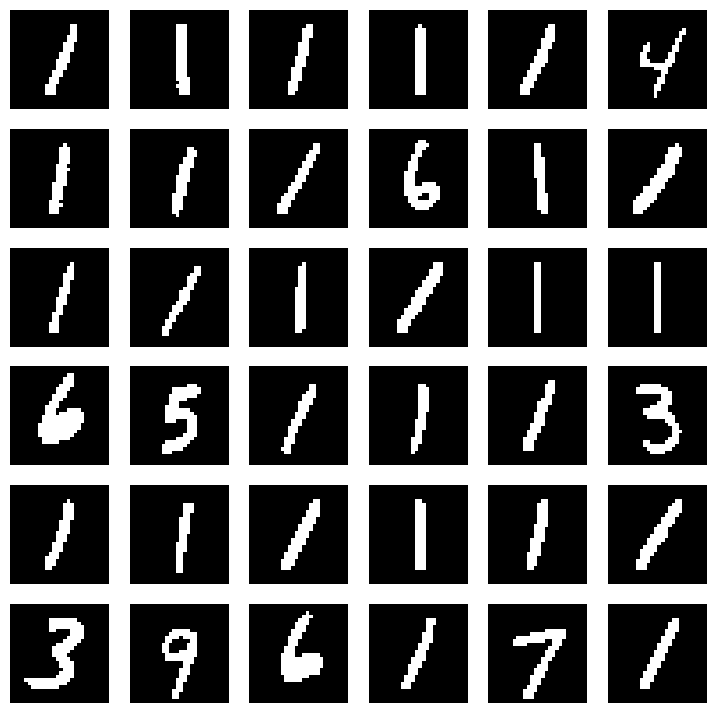

In [5]:
is_img = True

if is_img:
    samples = samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size)
    saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    fig = plt.figure(figsize=(9, 9)) 
    for i in range(n_samples):
        plt.subplot(int(np.sqrt(n_samples)), int(np.sqrt(n_samples)), 1 + i)
        plt.axis("off")
        plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")
 
 
    plt.savefig(saving_train_path)
    plt.show()
    plt.close()
else:
    bm, inv_bm = synthetic.get_binmap(cfg.model.concat_dim, cfg.data.binmode)
    print(inv_bm)
    samples = synthetic.bin2float(samples.astype(np.int32), inv_bm, cfg.model.concat_dim, cfg.data.int_scale)
 
    saving_plot_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    #aving_plot_path = '/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/TAUnSDDM/SavedModels/MNIST/'
    synthetic.plot_samples(samples, saving_plot_path, im_size=cfg.data.plot_size, im_fmt="png")

[0.9973781108856201, 0.6871102452278137, 0.5233135223388672, 0.4166312515735626, 0.34144699573516846, 0.29644984006881714, 0.2608772814273834, 0.23295776546001434, 0.21067176759243011, 0.18703940510749817, 0.17152069509029388, 0.15780895948410034, 0.1456916183233261, 0.14023526012897491, 0.12981858849525452, 0.1245039701461792, 0.11571712046861649, 0.10749717056751251, 0.10402494668960571, 0.10065901279449463, 0.09651360660791397, 0.09208475053310394, 0.08623865991830826, 0.08180981129407883, 0.08042800426483154, 0.07596372067928314, 0.07433389872312546, 0.07231434434652328, 0.06958616524934769, 0.06707058101892471, 0.06593678891658783, 0.06377550959587097, 0.0615079365670681, 0.058708902448415756, 0.059169501066207886, 0.05647675693035126, 0.05509495362639427, 0.052969105541706085, 0.05063067004084587, 0.050949547439813614, 0.050240930169820786, 0.048504818230867386, 0.04673327878117561, 0.04708758741617203, 0.0448908731341362, 0.043296486139297485, 0.041560374200344086, 0.04180838912

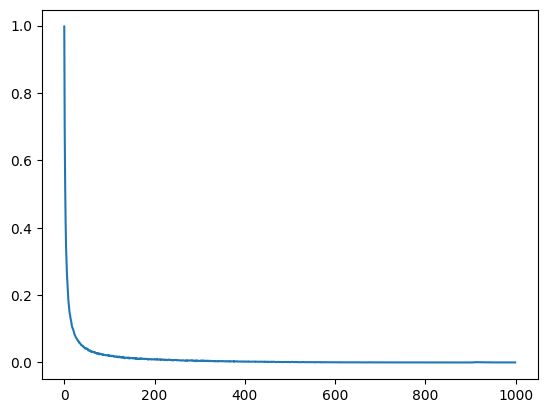

In [6]:
plt.plot(changes)
print(changes)
plt.show()